
--- Fold 1 ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.4375 | Precision: 0.4455 | Recall: 0.4375
              precision    recall  f1-score   support

           0     0.4941    0.4200    0.4541       100
           1     0.3111    0.4200    0.3574       100
           2     0.3590    0.2800    0.3146       100
           3     0.6176    0.6300    0.6238       100

    accuracy                         0.4375       400
   macro avg     0.4455    0.4375    0.4375       400
weighted avg     0.4455    0.4375    0.4375       400



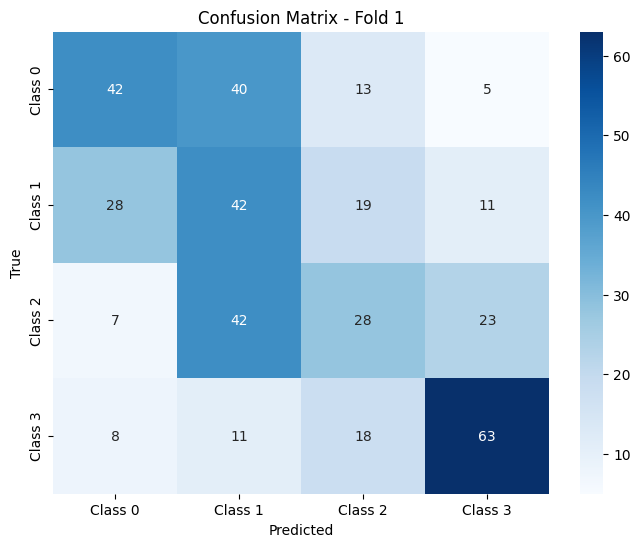


--- Fold 2 ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.4750 | Precision: 0.4794 | Recall: 0.4750
              precision    recall  f1-score   support

           0     0.4392    0.6500    0.5242       100
           1     0.4110    0.3000    0.3468       100
           2     0.4239    0.3900    0.4062       100
           3     0.6437    0.5600    0.5989       100

    accuracy                         0.4750       400
   macro avg     0.4794    0.4750    0.4690       400
weighted avg     0.4794    0.4750    0.4690       400



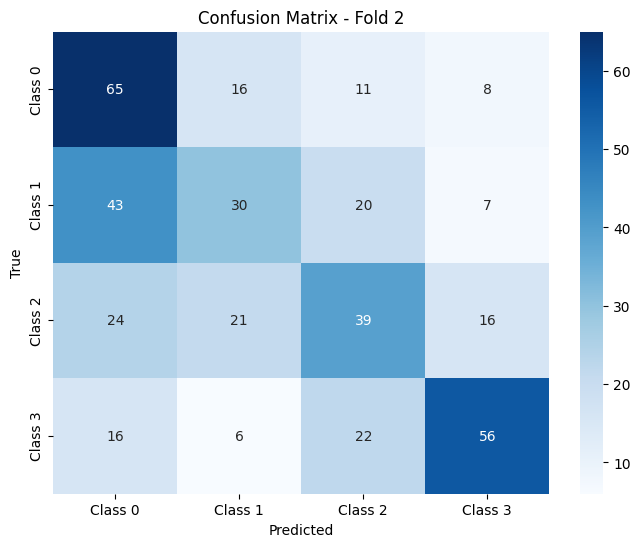


--- Fold 3 ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.4375 | Precision: 0.4838 | Recall: 0.4375
              precision    recall  f1-score   support

           0     0.6471    0.4400    0.5238       100
           1     0.3364    0.3600    0.3478       100
           2     0.3268    0.5000    0.3953       100
           3     0.6250    0.4500    0.5233       100

    accuracy                         0.4375       400
   macro avg     0.4838    0.4375    0.4475       400
weighted avg     0.4838    0.4375    0.4475       400



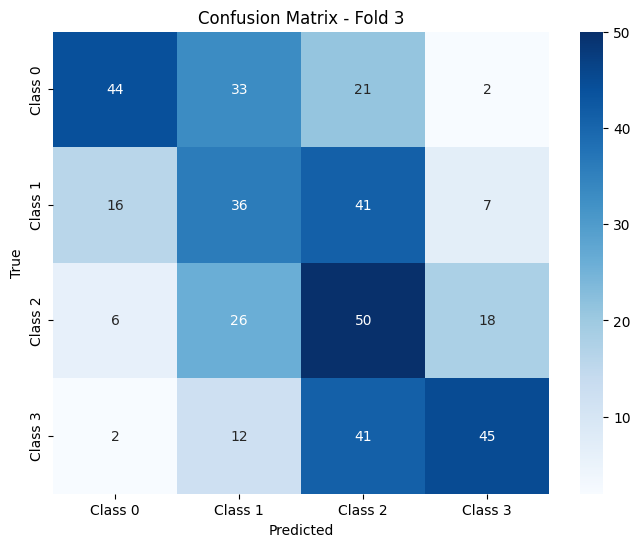


--- Fold 4 ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.4625 | Precision: 0.4484 | Recall: 0.4625
              precision    recall  f1-score   support

           0     0.5126    0.6100    0.5571       100
           1     0.3762    0.3800    0.3781       100
           2     0.4118    0.1400    0.2090       100
           3     0.4932    0.7200    0.5854       100

    accuracy                         0.4625       400
   macro avg     0.4484    0.4625    0.4324       400
weighted avg     0.4484    0.4625    0.4324       400



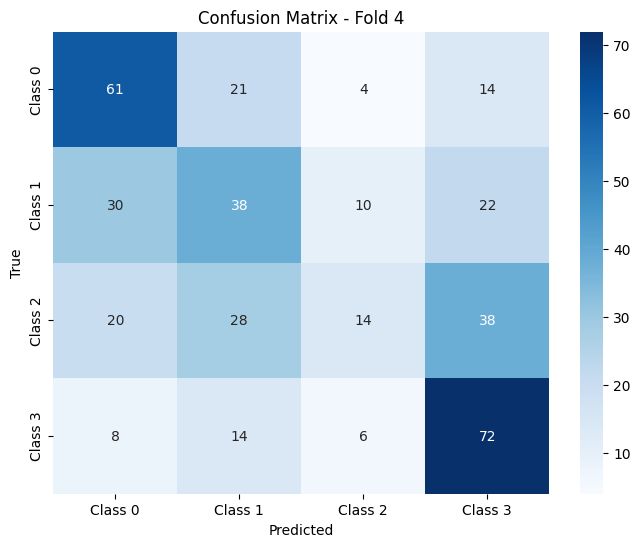


--- Fold 5 ---


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.4800 | Precision: 0.4798 | Recall: 0.4800
              precision    recall  f1-score   support

           0     0.6598    0.6400    0.6497       100
           1     0.4216    0.4300    0.4257       100
           2     0.3474    0.3300    0.3385       100
           3     0.4906    0.5200    0.5049       100

    accuracy                         0.4800       400
   macro avg     0.4798    0.4800    0.4797       400
weighted avg     0.4798    0.4800    0.4797       400



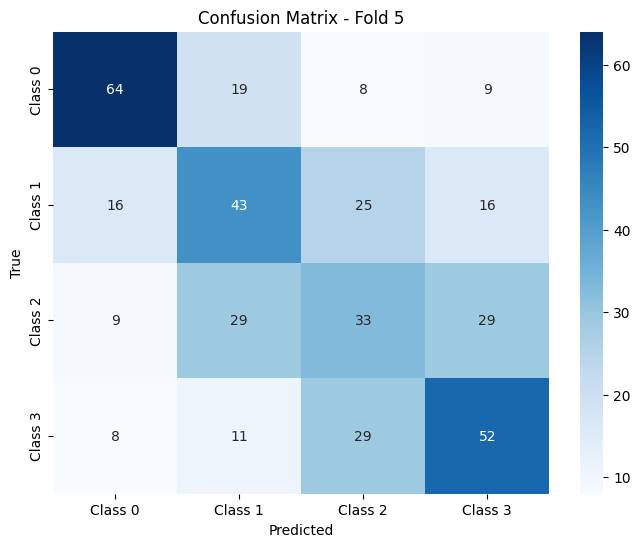


--- Cross-Validation Results (5-Fold) ---
Mean Accuracy: 0.4585 ± 0.0181
Mean Precision (macro): 0.4674 ± 0.0168
Mean Recall (macro): 0.4585 ± 0.0181


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session

df = pd.read_csv("train.csv")
X = df.drop(columns=["price_range"]).values
y = df["price_range"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))
y_cat = to_categorical(y)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
precisions = []
recalls = []

fold = 1
for train_idx, test_idx in kfold.split(X_scaled, y):
    print(f"\n--- Fold {fold} ---")

    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_cat[train_idx], y_cat[test_idx]
    y_true = y[test_idx]

    clear_session()

    model = Sequential([
        Conv1D(128, kernel_size=5, activation='relu', input_shape=(X_scaled.shape[1], 1)),
        Conv1D(64, kernel_size=3, activation='relu'),
        Conv1D(32, kernel_size=3, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(64, activation='relu'),
        Dense(4, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=0)

    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')

    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f}")
    print(classification_report(y_true, y_pred, digits=4))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1", "Class 2", "Class 3"], yticklabels=["Class 0", "Class 1", "Class 2", "Class 3"])
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    fold += 1

print("\n--- Cross-Validation Results (5-Fold) ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Mean Precision (macro): {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")
print(f"Mean Recall (macro): {np.mean(recalls):.4f} ± {np.std(recalls):.4f}")
